
# Complain Classification Assignment
****


## Workflow

#### 1. Problem Statement and Dataset description
#### 2. Business objective and constrains 
#### 3. Machine learning Formulation and Evalution mtric
#### 4. Loading Dataset
#### 5. Exploratory Data Analyses
#### 6. Pre-processing 
#### 7. Train Test Split
#### 8. Feature engineering 
#### 9. Modeling 
#### 10.Hyperparameter tuning 
#### 11. Results and Conclusion

In [211]:
# Ignore all your warnings
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading Libraries
import datetime
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
import pickle

import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, confusion_matrix, f1_score, classification_report

from tqdm import tqdm
import os
from wordcloud import WordCloud
from matplotlib_venn import venn2
import re
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
eng_stopwords = stopwords.words('english')
import gc
from bs4 import BeautifulSoup
from tqdm import tqdm
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import tensorflow
import pylab 
import scipy.stats as stats
from scipy.stats import boxcox

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize, StandardScaler
from scipy import sparse as sp
from scipy.sparse import hstack


## 1. Problem Statement and Dataset description

* This is an NLP-based problem solving approach for the dataset available as a consumer-complaint database for the Banking sector. It contains 1,179,715 rows and 18 columns. The dataset contains 300k+ rows of complaints texts.

* We need to classify consumer complaints text into these categories: Debt collection, Consumer Loan, Mortgage, Credit card, Credit reporting, Student loan, Bank account or service, Payday loan, Money transfers, other financial service, prepaid card.


## 2. Business objective and constrains and Dataset Loading

#### 2.1 Business objective and constrains

* Automated model will be very useful for a customer service department that wants to classify the complaints they receive from their customers. The classification of the issues they have received into buckets will help the department to provide customized solutions to the customers in each group.

* This model can also be expanded into a system that can recommend automatic solutions to future complaints as they come in.

#### 2.2 Business constrains

1. Model should be interpretable.
2. Feature importance is a plus.
3. Probability score of complain_category. 

## 3. Machine learning Formulation and Evalution metric


##### This is a straight forward multi classification problem. 

We need to classify consumer complaints text into these categories: Debt collection, Consumer Loan, Mortgage, Credit card, Credit reporting, Student loan, Bank account or service, Payday loan, Money transfers, other financial service, prepaid card.

#### Evaluation metric

1. log loss
2. micro multi f1_score

## 4. Dataset Loading

In [2]:
data = pd.read_csv('consumer_complaints.csv',parse_dates=['date_received'])

print(f"shape of dataset {data.shape}\n")
data.sample(2)

shape of dataset (555957, 18)



,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
309196,2015-10-22,Credit card,NaN,Billing disputes,NaN,My complaint is Chase Amazon Visa did not addr...,NaN,JPMorgan Chase & Co.,CA,913XX,Older American,Consent provided,Web,10/22/2015,Closed with explanation,Yes,No,1619439
7592,2013-11-16,Credit reporting,NaN,Credit reporting company's investigation,Problem with statement of dispute,NaN,NaN,Experian,NJ,08094,Older American,NaN,Web,11/18/2013,Closed with non-monetary relief,Yes,No,601362


## 5. Exploratory Data Analyses

### 5.1. Overview of dataset 

In [3]:
print(f"shape of dataset {data.shape}\n")
data.sample(2)

shape of dataset (555957, 18)



,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
486355,2013-12-15,Credit card,NaN,Billing disputes,NaN,NaN,NaN,Capital One,CA,92626,NaN,NaN,Web,12/15/2013,Closed with monetary relief,Yes,No,634517
315095,2015-12-10,Credit reporting,NaN,Incorrect information on credit report,Reinserted previously deleted info,NaN,Company chooses not to provide a public response,Experian,OH,4566,NaN,NaN,Phone,12/11/2015,Closed with explanation,Yes,No,1691645


In [4]:
# Basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
date_received                   555957 non-null datetime64[ns]
product                         555957 non-null object
sub_product                     397635 non-null object
issue                           555957 non-null object
sub_issue                       212622 non-null object
consumer_complaint_narrative    66806 non-null object
company_public_response         85124 non-null object
company                         555957 non-null object
state                           551070 non-null object
zipcode                         551452 non-null object
tags                            77959 non-null object
consumer_consent_provided       123458 non-null object
submitted_via                   555957 non-null object
date_sent_to_company            555957 non-null object
company_response_to_consumer    555957 non-null object
timely_response                 555957 non-null object
cons

In [5]:
# dataset attributes containing null values
data.isnull().any()

date_received                   False
product                         False
sub_product                      True
issue                           False
sub_issue                        True
consumer_complaint_narrative     True
company_public_response          True
company                         False
state                            True
zipcode                          True
tags                             True
consumer_consent_provided        True
submitted_via                   False
date_sent_to_company            False
company_response_to_consumer    False
timely_response                 False
consumer_disputed?              False
complaint_id                    False
dtype: bool

* There are definetely some features which has null values.

### 5.2. EDA: product (Class_label)

In [6]:
# The category of products is the class labels here which we need to predict

# Class label
y = data['product'] 
# Features
X = data.drop(axis=0,columns='product')

print(f"There are {len(y.unique())} Categories in which we need to categorise the complaints :\n")
for idx, category in enumerate(y.unique()):
    print(idx+1,":",category)

There are 11 Categories in which we need to categorise the complaints :

1 : Mortgage
2 : Credit reporting
3 : Student loan
4 : Debt collection
5 : Credit card
6 : Bank account or service
7 : Consumer Loan
8 : Money transfers
9 : Payday loan
10 : Prepaid card
11 : Other financial service


#### 5.2.1. Distribution of class labels

In [7]:
# null values in class_labels
print(f"Any null values in class_labels: {y.isnull().any()}")

Any null values in class_labels: False


In [8]:
# Dataframe of distribution of class label
pd.DataFrame({"categories": (y.value_counts().index), "frequency":y.value_counts().values, "distribution_probabily": y.value_counts().values/sum(y.value_counts().values)})

,categories,frequency,distribution_probabily
0,Mortgage,186475,0.335413
1,Debt collection,101052,0.181762
2,Credit reporting,91854,0.165218
3,Credit card,66468,0.119556
4,Bank account or service,62563,0.112532
5,Consumer Loan,20990,0.037755
6,Student loan,15839,0.028490
7,Payday loan,3877,0.006974
8,Money transfers,3812,0.006857
9,Prepaid card,2470,0.004443


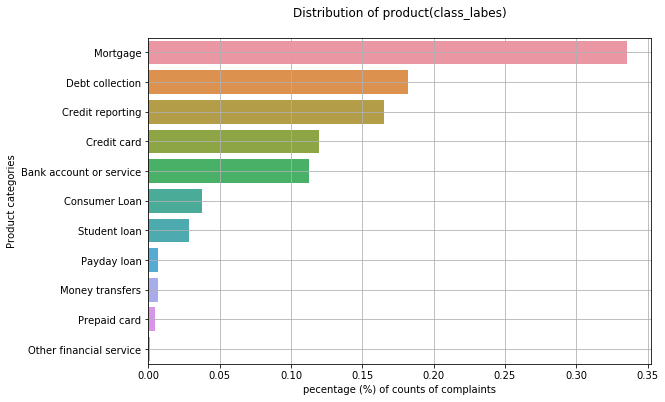

In [9]:
# Visualisation of distribution of class label
plt.figure(figsize=(9,6))
sns.barplot(x= (y.value_counts().values/sum(y.value_counts().values)), y =(y.value_counts().index) )
plt.title("Distribution of product(class_labes)\n")
plt.xlabel("pecentage (%) of counts of complaints")
plt.ylabel("Product categories")
plt.grid()
plt.show()


Observation:
* Clearly the class_labels are are imbalaced so we need to keep this in mind that we don't underfit on majority class.
* 'Mortgage' category has highest distribution mong all (~33%).
* The Distribution of 'Other financial service' is minimum among all(~0.01%).

##### Features or attributes given to predict class_labels

In [10]:
#Features or attributes give to predict those features
for idx, col in enumerate(X.columns):
    print(idx+1, ":", col)

1 : date_received
2 : sub_product
3 : issue
4 : sub_issue
5 : consumer_complaint_narrative
6 : company_public_response
7 : company
8 : state
9 : zipcode
10 : tags
11 : consumer_consent_provided
12 : submitted_via
13 : date_sent_to_company
14 : company_response_to_consumer
15 : timely_response
16 : consumer_disputed?
17 : complaint_id


### 5.3. EDA: complaint_id

In [11]:
# Any null complaint_id 
print(f"Any null values in 'complaint_id' columns: {X.complaint_id.isnull().any()}\n")

# Any null complaint_id 
print(f"Any duplicate values in 'complaint_id' columns: {(X.duplicated(subset='complaint_id')).any()}")

Any null values in 'complaint_id' columns: False

Any duplicate values in 'complaint_id' columns: False


* complaint_id identify each complain uniquely and is primary key of this data

### 5.3. EDA: date_recieved

In [12]:
# Any null date_recieved 
print(f"Any null values in 'date_recieved' columns: {data.date_received.isnull().any()}")

Any null values in 'date_recieved' columns: False


#### 5.3.1. Distribution of complains based on date_recieved

In [13]:
## Range of timestamp in this perticular dataset
print(f"Range of timestamp in dataset: {data['date_received'].min()} ----{data['date_received'].max()}")

Range of timestamp in dataset: 2011-12-01 00:00:00 ----2016-04-25 00:00:00


##### Weakely and monthly patterns of number of complains recieved

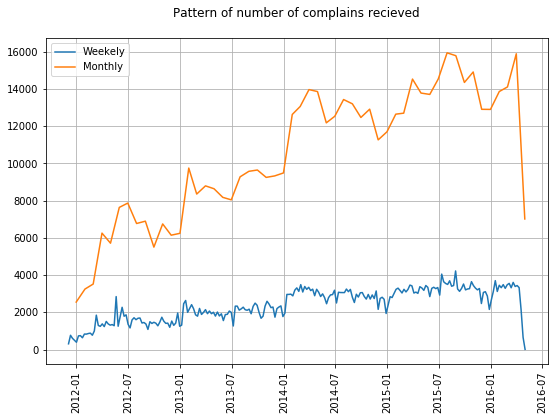

In [14]:
# Weakely Pattern and monthly patterns of number of complains recieved
week_pattern = data.set_index(['date_received']).resample("W")["complaint_id"].count()
month_pattern = data.set_index(['date_received']).resample("M")["complaint_id"].count()

plt.figure(figsize=(9,6))
plt.plot(week_pattern.index,week_pattern.values, label = 'Weekely')
plt.plot(month_pattern.index,month_pattern.values, label = 'Monthly')
plt.legend()
plt.title("Pattern of number of complains recieved\n")
plt.xticks(rotation=90)
plt.grid()


### 5.4. EDA: sub_product

In [15]:
#number of unique 'sub_product
print(f"Number of unique 'sub_product': {len(data.sub_product.unique())}\n")

# Any null sub_product 
print(f"Number of  null values in 'sub_product' columns: {sum(data.sub_product.isnull())} ({round((sum(data.sub_product.isnull())/data.shape[0])*100,2)} %)\n")


Number of unique 'sub_product': 47

Number of  null values in 'sub_product' columns: 158322 (28.48 %)



#### 5.4.1. Distribution of sub_product

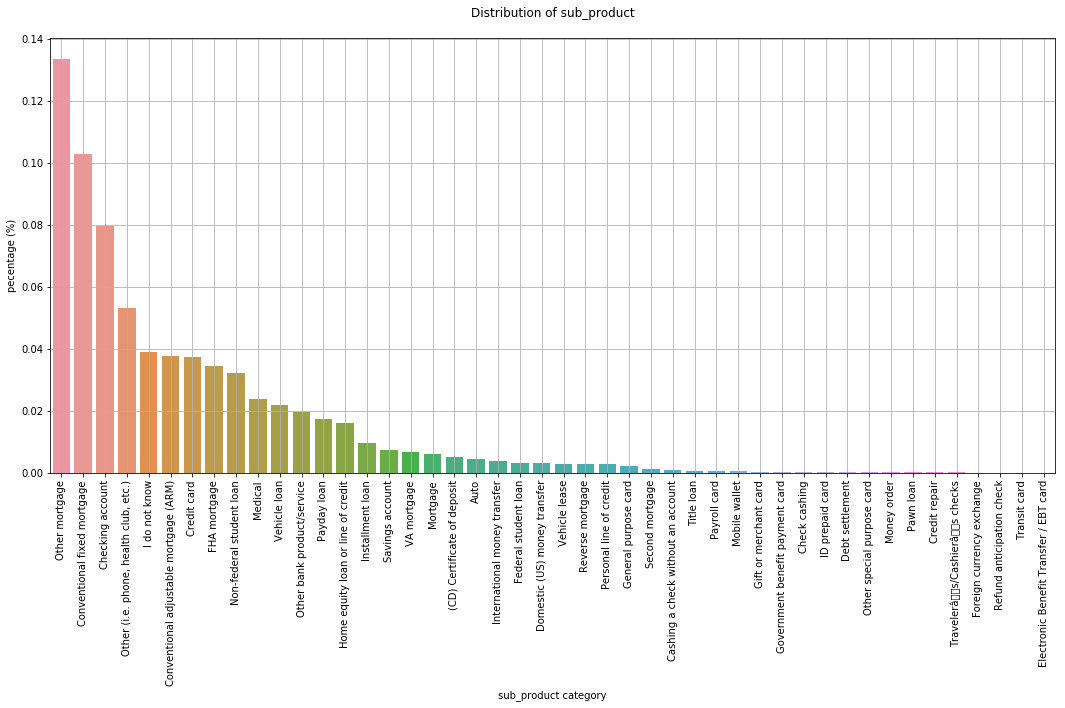

In [16]:
# Visualisation of distribution of sub_product

sub_product_value_count=(data.sub_product.value_counts(dropna=False))

plt.figure(figsize=(18,8))
sns.barplot(x= (sub_product_value_count.index) , y = (sub_product_value_count.values/sum(sub_product_value_count.values)) )
plt.title("Distribution of sub_product\n")
plt.xlabel("sub_product category")
plt.ylabel("pecentage (%)")
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### 5.4.1. Distribution of subissue by isuue

1 : Plot for Distribution of sub_product by product category - Mortgage



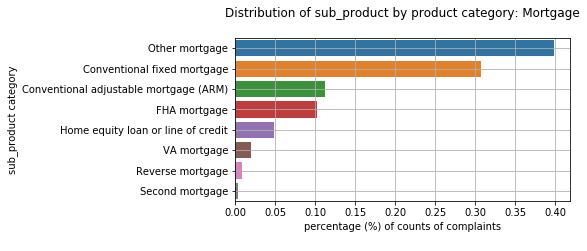

2 : Plot for Distribution of sub_product by product category - Credit reporting

**** All values of sub_product in product category-Credit reporting is null ****

3 : Plot for Distribution of sub_product by product category - Student loan



<Figure size 432x216 with 0 Axes>

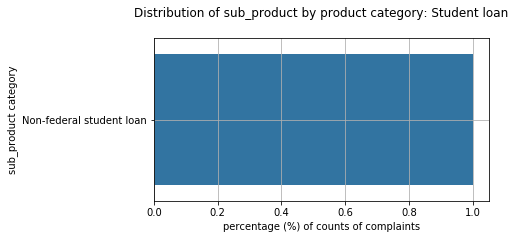

4 : Plot for Distribution of sub_product by product category - Debt collection



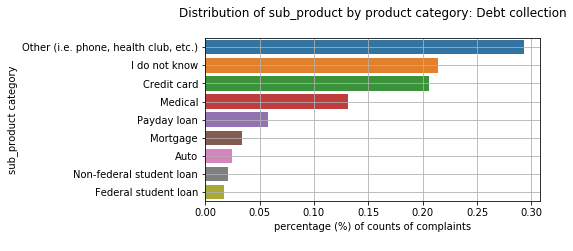

5 : Plot for Distribution of sub_product by product category - Credit card

**** All values of sub_product in product category-Credit card is null ****

6 : Plot for Distribution of sub_product by product category - Bank account or service



<Figure size 432x216 with 0 Axes>

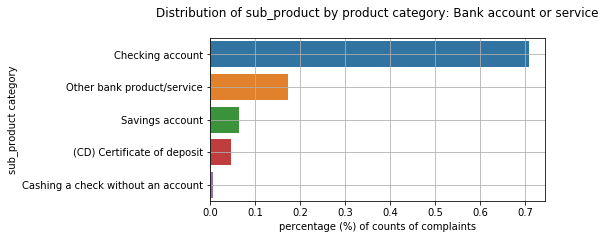

7 : Plot for Distribution of sub_product by product category - Consumer Loan



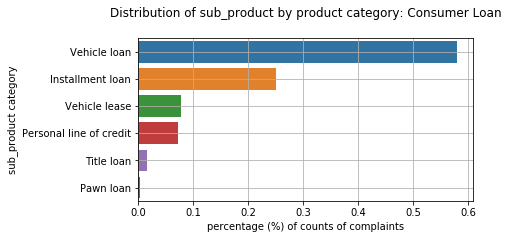

8 : Plot for Distribution of sub_product by product category - Money transfers



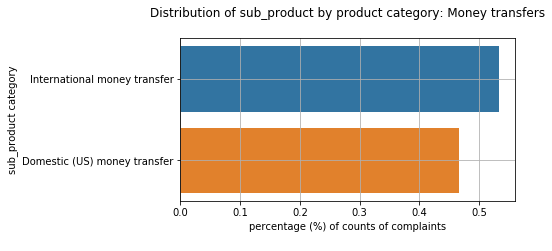

9 : Plot for Distribution of sub_product by product category - Payday loan



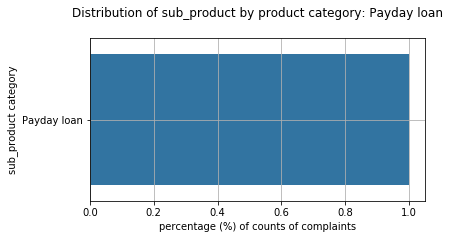

10 : Plot for Distribution of sub_product by product category - Prepaid card



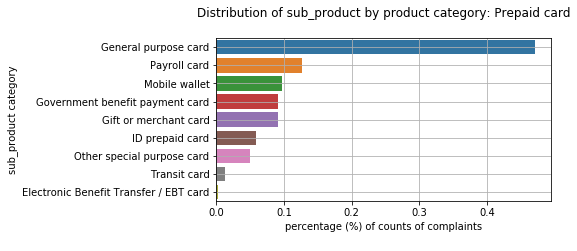

11 : Plot for Distribution of sub_product by product category - Other financial service



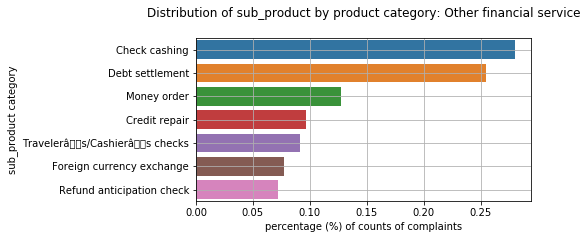

In [82]:
for idx, product_cat in enumerate(data['product'].unique()):
    
    temp = data[data['product'] == product_cat]['sub_product']
    print(f"{idx+1} : Plot for Distribution of sub_product by product category - {product_cat}\n")
    
    try:
        #ploting
        plt.figure(figsize=(6,3))
        sns.barplot(x = (temp.value_counts().values/sum(temp.value_counts().values)), y = temp.value_counts().index )
        plt.title(f"Distribution of sub_product by product category: {product_cat}\n")
        plt.ylabel("sub_product category")
        plt.xlabel("percentage (%) of counts of complaints\n")
        plt.grid()
        plt.show()
        
    except:
        print(f"**** All values of sub_product in product category-{product_cat} is null ****\n")



### 5.5. EDA: company

In [85]:
# Any null values for company column
print(f"Any null values for company column: {data.company.isnull().any()}\n")

# Number of unique company 
print(f"Number of unique company : {len(data.company.unique())}")

Any null values for company column: False

Number of unique company : 3605


#### 5.5.1. Counts of complaints by 'company': Top 50

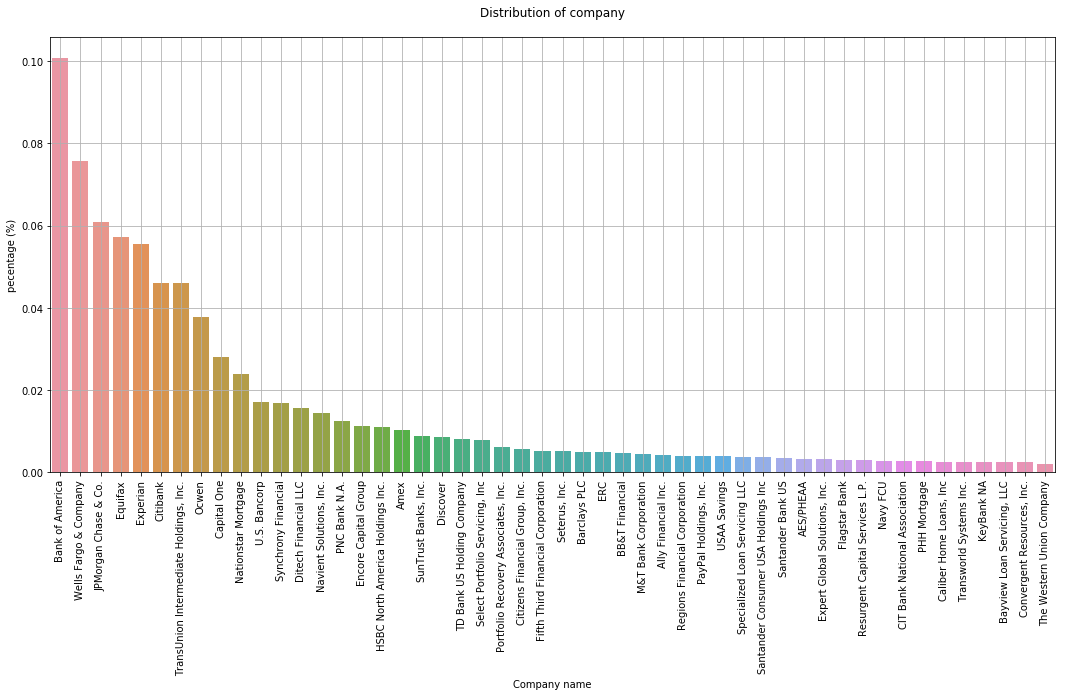

In [19]:
# Distribution of 'company' ( top 50)
company_value_count = data.company.value_counts()

plt.figure(figsize=(18,8))
sns.barplot(x= (company_value_count.index)[:50] , y = (company_value_count.values/sum(company_value_count.values))[:50] )
plt.title("Distribution of company\n")
plt.xlabel("Company name")
plt.ylabel("pecentage (%)")
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### 5.5.2. CDF plot of counts of complaints by company

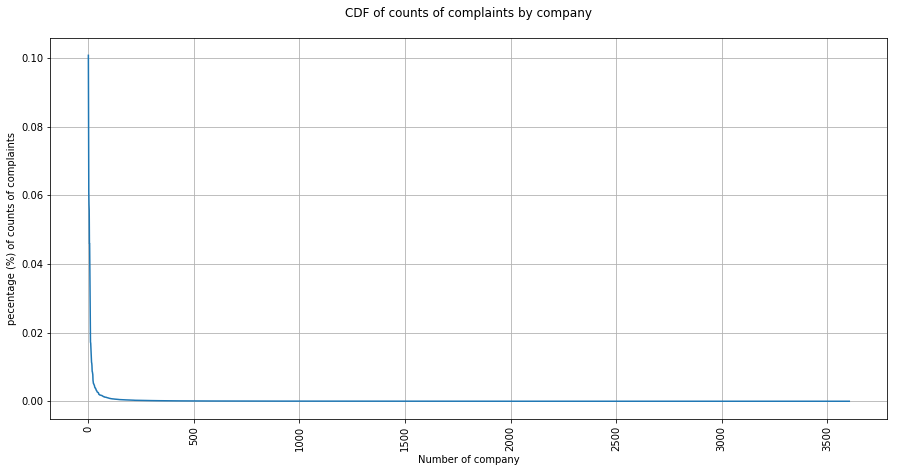

In [20]:
# CDF of counts of complaints by company

plt.figure(figsize=(15,7))
plt.plot(company_value_count.values/sum(company_value_count.values))
plt.title("CDF of counts of complaints by company\n")
plt.xlabel("Number of company")
plt.ylabel("pecentage (%) of counts of complaints")
plt.xticks(rotation=90)
plt.grid()
plt.show()

* There are very few companies which has very large number of consumer complaints.
* Large number of companies has very few complaints. 

### 5.6. EDA: state

In [21]:
# Any null values for state column
print(f"Number of complaints having null state column: {sum(data.state.isnull())} ({round((sum(data.state.isnull())/data.shape[0])*100,2)})%")

Number of complaints having null state column: 4887 (0.88)%


In [22]:
# Number of unique company 
print(f"Number of unique state : {len(data.state.unique())}")

Number of unique state : 63


#### 5.6.1. Counts of complaints based on state

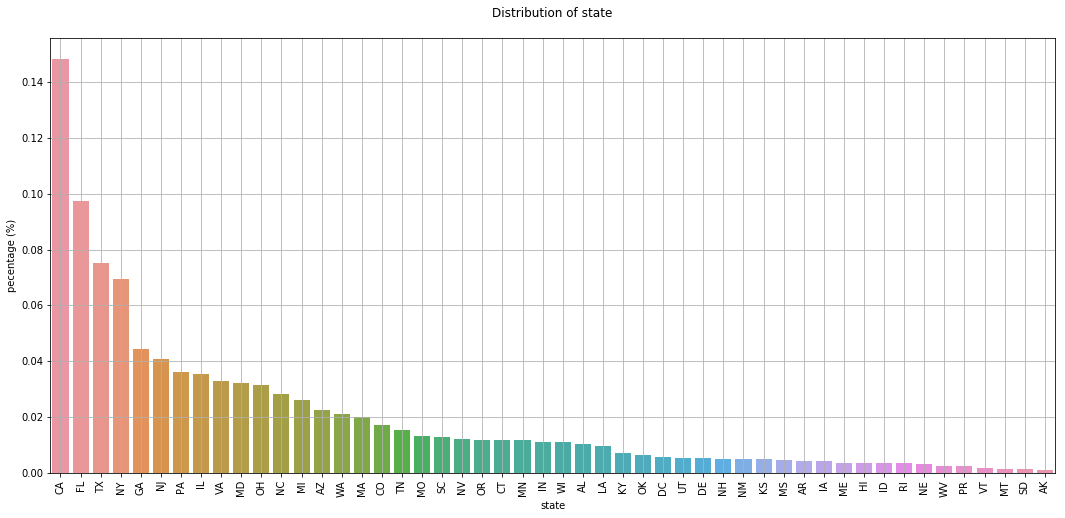

In [23]:
# Dsitribution of complaints based on state

# Distribution of 'company' ( top 50)
company_value_count = data.state.value_counts()

plt.figure(figsize=(18,8))
sns.barplot(x= (company_value_count.index)[:50] , y = (company_value_count.values/sum(company_value_count.values))[:50] )
plt.title("Distribution of state\n")
plt.xlabel("state")
plt.ylabel("pecentage (%)")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [222]:
# Counts of complaints based on state by product category

"""for product_category in  data['product'].unique():
    
    product_category_state = data[data['product']==product_category]
    product_category_state_value_count = product_category_state['state'].value_counts()
    
    
    plt.figure(figsize=(18,6))
    sns.barplot(x= product_category_state_value_count.index , y = product_category_state_value_count.values )
    plt.title("Distribution of state\n")
    plt.xlabel("state")
    plt.ylabel("pecentage (%)")
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()
"""

print("Uncomment to see distribution complaints based on state by product category") 

Uncomment to see distribution complaints based on state by product category


### 5.7. EDA: submitted_via 

In [25]:
# Any nul values of submitted_via
data['submitted_via'].isnull().any()

False

#### 5.7.1 Distribution of submitted_via

In [26]:
# Distribution of submitted_via
submitted_via_value_count = data['submitted_via'].value_counts()

# Dataframe of distribution of submitted_via
submitted_via_value_count_df = pd.DataFrame({"categories": (submitted_via_value_count.index), "frequency":submitted_via_value_count.values,
                                             "distribution_probabily": submitted_via_value_count.values/sum(submitted_via_value_count.values)})
submitted_via_value_count_df

,categories,frequency,distribution_probabily
0,Web,361338,0.649939
1,Referral,109379,0.196740
2,Phone,40026,0.071995
3,Postal mail,36752,0.066106
4,Fax,8118,0.014602
5,Email,344,0.000619


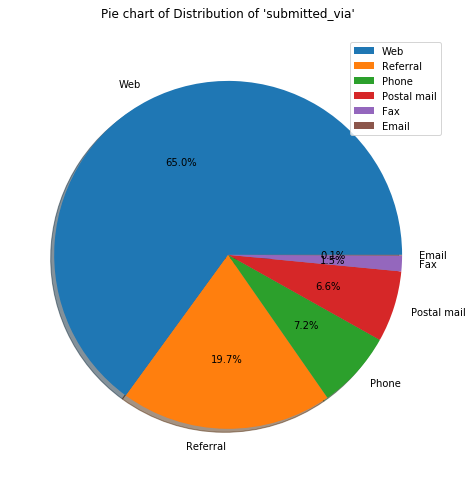

In [27]:
# Plot for Distribution of 'submitted_via'
plt.figure(figsize=(12,8))

# Ploting
plt.pie(submitted_via_value_count_df['frequency'].values, labels = submitted_via_value_count_df.categories.values, shadow=True, autopct='%.1f%%')
plt.title("Pie chart of Distribution of 'submitted_via'\n")
plt.legend()
plt.show()

#### 5.7.2.  Distribution of submitted_via hue by product (class_label)

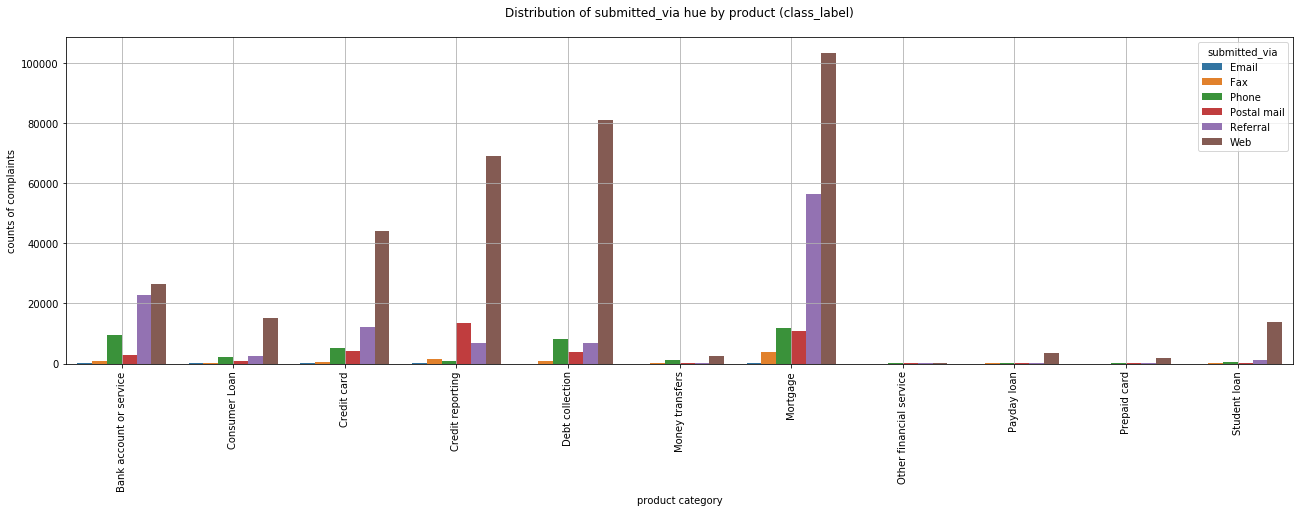

In [28]:
# grouping submitted_via by product and aggregating 
temp = data.groupby(['product','submitted_via'])['submitted_via'].agg(['count'])
temp = temp.reset_index(level=0)
temp = temp.reset_index(level=0)

#ploting
plt.figure(figsize=(22,6))
sns.barplot(x=temp['product'],y=temp['count'],hue=temp['submitted_via'])
plt.title("Distribution of submitted_via hue by product (class_label)\n")
plt.xlabel("product category")
plt.ylabel("counts of complaints")
plt.xticks(rotation=90)
plt.grid()
plt.show()


### 5.8. EDA: issue

In [29]:
# Any nul values of issue
data['issue'].isnull().any()

False

In [30]:
# bumber of unique isuue
print(f"number of unique issues: {len(data['issue'].unique())}")

number of unique issues: 95


#### 5.8.1 Distribution of issue

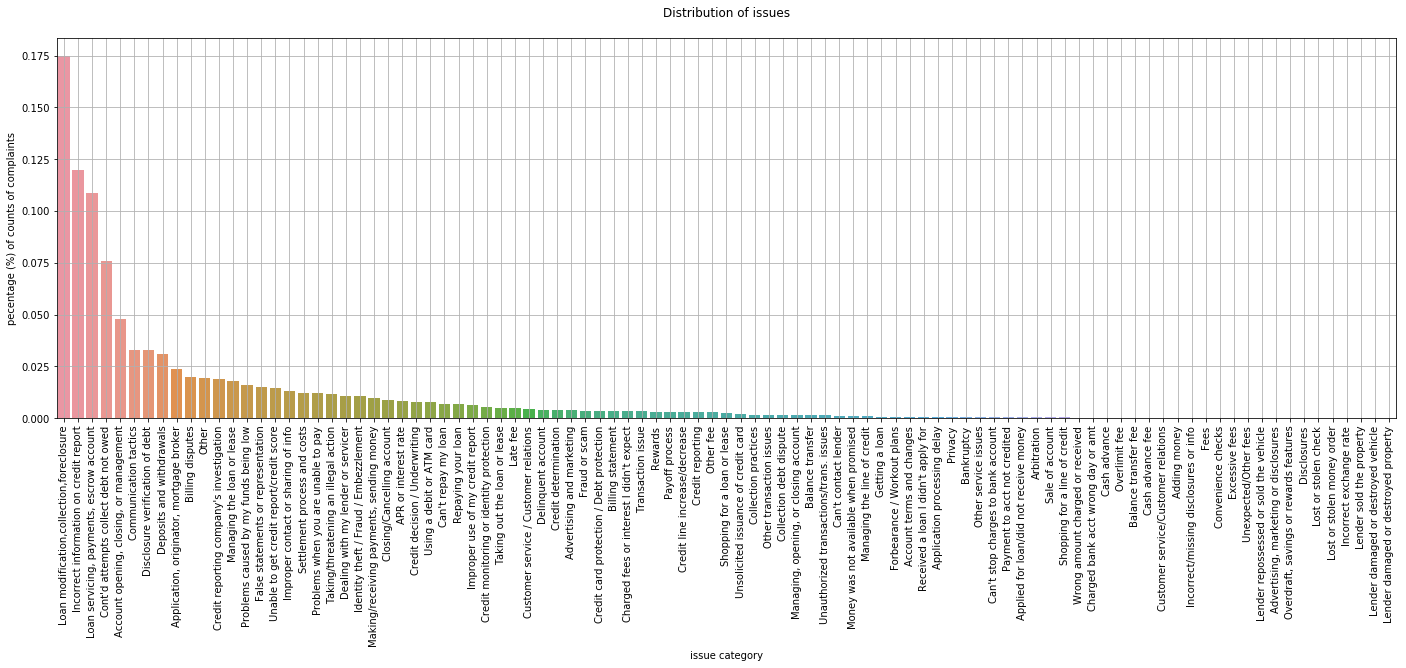

In [31]:
# Visualisation of distribution of 'issues'
issue_value_count = data['issue'].value_counts()

plt.figure(figsize=(24,7))
sns.barplot(x= (issue_value_count.index) , y = (issue_value_count.values/sum(issue_value_count.values)) )
plt.title("Distribution of issues\n")
plt.xlabel("issue category")
plt.ylabel("pecentage (%) of counts of complaints")
plt.xticks(rotation=90)
plt.grid()
plt.show()

### 5.9. EDA: consumer_disputed?

In [32]:
# Any null values in consumer_disputed 
data['consumer_disputed?'].isnull().any()

False

#### 5.9.1. Distribution of consumer_disputed

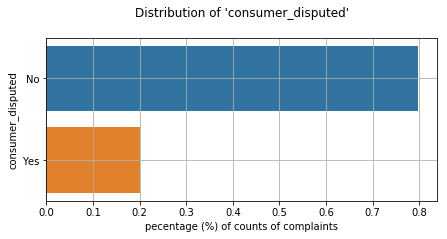

In [33]:
# Visualisation of distribution of 'consumer_disputed'
consumer_disputed_count = data['consumer_disputed?'].value_counts()

plt.figure(figsize=(7,3))
sns.barplot(y= (consumer_disputed_count.index) , x = (consumer_disputed_count.values/sum(consumer_disputed_count.values)) )
plt.title("Distribution of 'consumer_disputed'\n")
plt.ylabel("consumer_disputed")
plt.xlabel("pecentage (%) of counts of complaints")
plt.grid()
plt.show()


#### 5.9.2.  Distribution of consumer_disputed hue by product (class_label)

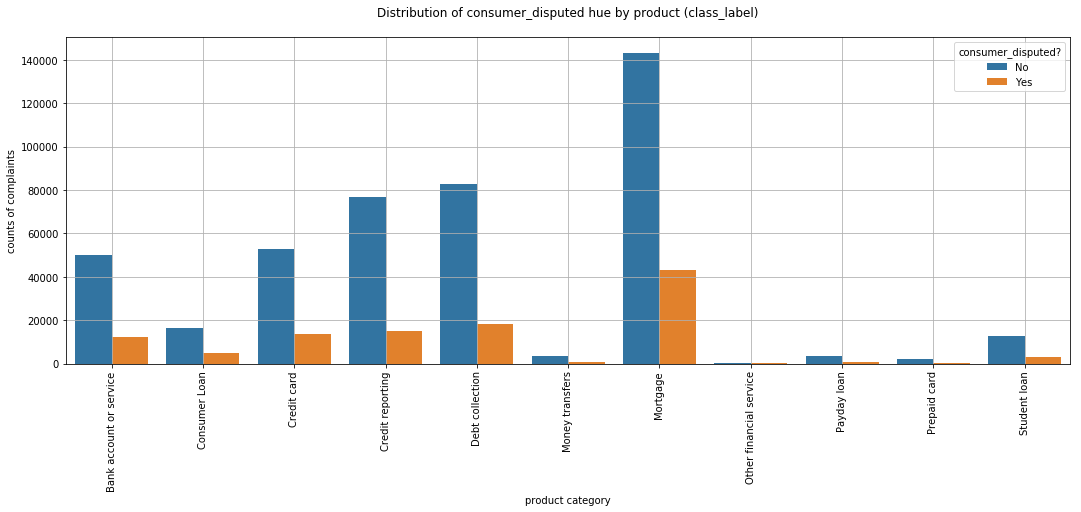

In [34]:
# grouping consumer_disputed by product and aggregating 
temp = data.groupby(['product','consumer_disputed?'])['consumer_disputed?'].agg(['count'])
temp = temp.reset_index(level=0)
temp = temp.reset_index(level=0)

#ploting
plt.figure(figsize=(18,6))
sns.barplot(x=temp['product'],y=temp['count'],hue=temp['consumer_disputed?'])
plt.title("Distribution of consumer_disputed hue by product (class_label)\n")
plt.xlabel("product category")
plt.ylabel("counts of complaints")
plt.xticks(rotation=90)
plt.grid()
plt.show()


### 5.10. EDA: company_response_to_consumer

In [35]:
# Any nul values of company_response_to_consumer
data['company_response_to_consumer'].isnull().any()

False

In [36]:
# Number of unique company_response_to_consumer
print(f"Number of unique company_response_to_consumer: {len(data['company_response_to_consumer'].unique())}")

Number of unique company_response_to_consumer: 8


#### 5.10.1. Distribution of submitted_via

In [37]:
# Distribution of company_response_to_consumer
company_response_to_consumer_value_count = data['company_response_to_consumer'].value_counts()

# Dataframe of distribution of company_response_to_consumer
company_response_to_consumer_value_count_df = pd.DataFrame({"categories": (company_response_to_consumer_value_count.index), "frequency":company_response_to_consumer_value_count.values,
                                             "distribution_probabily": company_response_to_consumer_value_count.values/sum(company_response_to_consumer_value_count.values)})
company_response_to_consumer_value_count_df

,categories,frequency,distribution_probabily
0,Closed with explanation,404293,0.727202
1,Closed with non-monetary relief,70237,0.126335
2,Closed with monetary relief,38262,0.068822
3,Closed without relief,17909,0.032213
4,Closed,13399,0.024101
5,Closed with relief,5305,0.009542
6,In progress,3763,0.006769
7,Untimely response,2789,0.005017


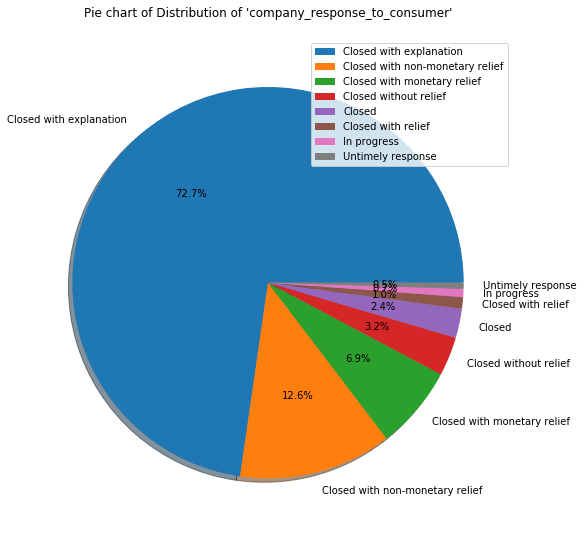

In [38]:
# Plot for Distribution of 'company_response_to_consumer'
plt.figure(figsize=(15,9))

# Ploting
plt.pie(company_response_to_consumer_value_count_df['frequency'].values, labels = company_response_to_consumer_value_count_df.categories.values, shadow=True, autopct='%.1f%%')
plt.title("Pie chart of Distribution of 'company_response_to_consumer'\n")
plt.legend()
plt.show()

#### 5.10.2.  Distribution of consumer_disputed hue by product (class_label)

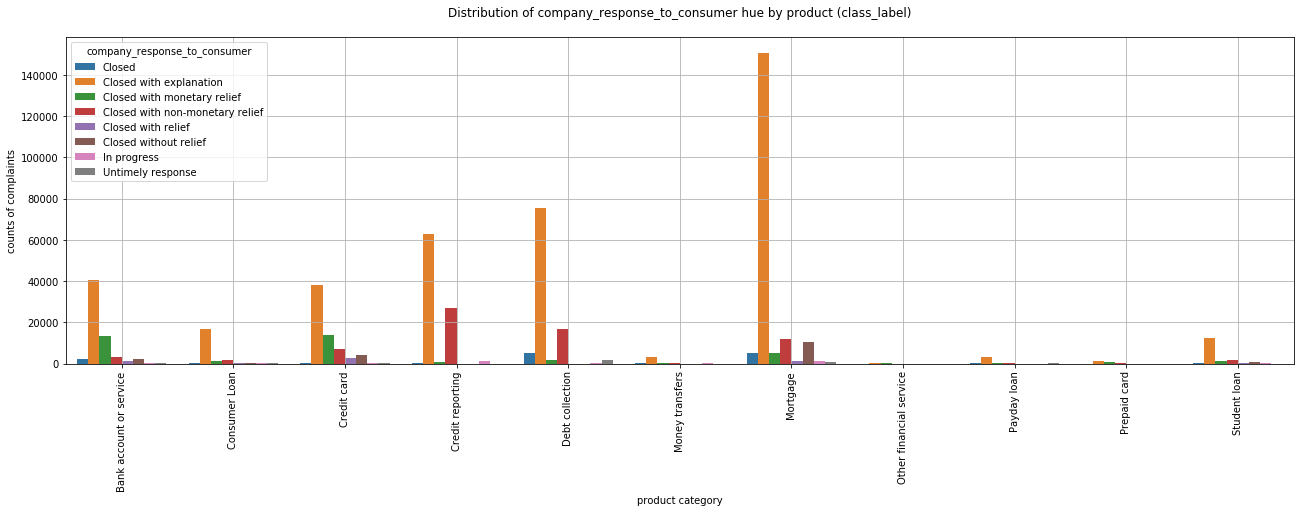

In [39]:
# grouping company_response_to_consumer by product and aggregating 
temp = data.groupby(['product','company_response_to_consumer'])['company_response_to_consumer'].agg(['count'])
temp = temp.reset_index(level=0)
temp = temp.reset_index(level=0)

#ploting
plt.figure(figsize=(22,6))
sns.barplot(x=temp['product'],y=temp['count'],hue=temp['company_response_to_consumer'])
plt.title("Distribution of company_response_to_consumer hue by product (class_label)\n")
plt.xlabel("product category")
plt.ylabel("counts of complaints")
plt.xticks(rotation=90)
plt.grid()
plt.show()


### 5.11. EDA: tags

In [85]:
# number of null values in 'tags'
print(f"Number of  null values in 'tags': {sum(data['tags'].isnull())} ({round((sum(data['tags'].isnull())/data.shape[0])*100,2)})%")

Number of  null values in 'tags': 477998 (85.98)%


* Very large amount of datapoints has null value in tag coumns

#### 5.11.1. Distribution of tags

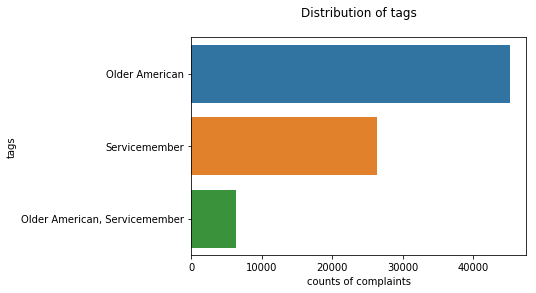

In [99]:
sns.barplot(x = data['tags'].value_counts(dropna=False).values, y = (data['tags'].value_counts(dropna=False).index))
plt.title("Distribution of tags\n")
plt.ylabel("tags")
plt.xlabel("counts of complaints")
plt.show()

#### 5.10.2.  Distribution of tags hue by product (class_label)

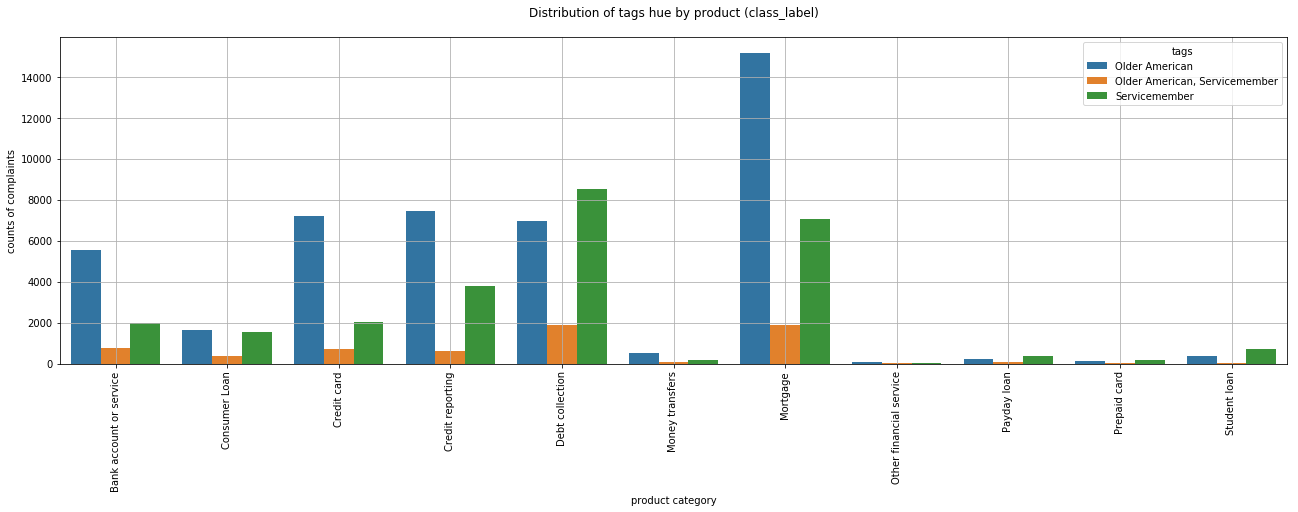

In [100]:
# grouping tags by product and aggregating 
temp = data.groupby(['product','tags'])['tags'].agg(['count'])
temp = temp.reset_index(level=0)
temp = temp.reset_index(level=0)

#ploting
plt.figure(figsize=(22,6))
sns.barplot(x=temp['product'],y=temp['count'],hue=temp['tags'])
plt.title("Distribution of tags hue by product (class_label)\n")
plt.xlabel("product category")
plt.ylabel("counts of complaints")
plt.xticks(rotation=90)
plt.grid()
plt.show()


### 5.12. EDA: consumer_complaint_narrative

In [40]:
# Number of complaints having null 'consumer_complaint_narrative'
print(f"Number of  null values in 'consumer_complaint_narrative' columns: {sum(data.consumer_complaint_narrative.isnull())} ({round((sum(data.consumer_complaint_narrative.isnull())/data.shape[0])*100,2)} %)\n")

# Number of complaints in 'consumer_complaint_narrative'
print(f"Number of complaints having 'consumer_complaint_narrative': {sum(data.consumer_complaint_narrative.notnull())} ({round((sum(data.consumer_complaint_narrative.notnull())/data.shape[0])*100,2)} %)\n")

Number of  null values in 'consumer_complaint_narrative' columns: 489151 (87.98 %)

Number of complaints having 'consumer_complaint_narrative': 66806 (12.02 %)



#### 5.12.1. How many duplicate consumer_complaint_narrative are present in dataset?

In [41]:
#Number of duplicate consumer_complaint_narrative out of total complaints having 'consumer_complaint_narrative'
print(f"Number of duplicate consumer_complaint_narrative: {sum(data[data['consumer_complaint_narrative'].notnull()].duplicated(subset=['consumer_complaint_narrative']))}\n")

dup_complain_narrative_txt = round((sum(data[data['consumer_complaint_narrative'].notnull()].duplicated(subset=['consumer_complaint_narrative'])))/sum(data.consumer_complaint_narrative.notnull())*100,2)
print(f"{dup_complain_narrative_txt} % of total consumer_complaint_narrative given is duplicate.")

Number of duplicate consumer_complaint_narrative: 1160

1.74 % of total consumer_complaint_narrative given is duplicate.


#### 5.12.2. how many complaints has same consumer_complaint_narrative as well as same class label

In [42]:
print(f"Number of complaints having same consumer_complaint_narrative as well as same class_labels: {sum(data[data['consumer_complaint_narrative'].notnull()].duplicated(subset=['consumer_complaint_narrative','product']))}")


Number of complaints having same consumer_complaint_narrative as well as same class_labels: 1141


##### Utility Functions for ploting text data

In [43]:
# Utility function for box plot
def box_plot(data, feature_name=None):
    
    plt.figure(figsize=(26,4))
    sns.violinplot(data,color='darkred')
    plt.title(f'Train : violinplot Plot for {feature_name} \n')
    plt.xlabel(f"{feature_name}")
    plt.ylabel(f"Distribution")   
    plt.grid()
    plt.show()

# Utility function to check if feature or variable follows Normal distribution using Q-Q Plot   
def q_q_plot(data, feature_name=None):
    """
    # code refer: https://stackoverflow.com/a/13865874
    """
    f, (ax1) = plt.subplots(1, 1, figsize=(7, 5))
    
    measurements = data
    stats.probplot(measurements, dist="norm", plot=ax1)
    ax1.set(title=f' Q-Q Plot for {feature_name} \n')


#### 5.12.3. Number of words in consumer_complaint_narrative

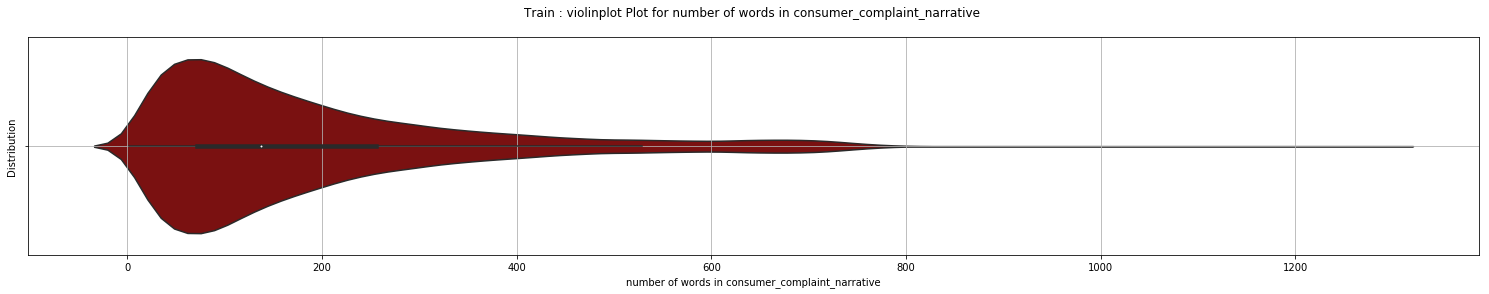

In [44]:
# number of words in consumer_complaint_narrative
n_words_in_consumer_complaint_narrative = sorted(data[data['consumer_complaint_narrative'].notnull()]['consumer_complaint_narrative'].apply(lambda x: len(x.split(" "))),reverse=True)

# Box plot of  number of words in consumer_complaint_narrative
box_plot(n_words_in_consumer_complaint_narrative, "number of words in consumer_complaint_narrative" )

* Distribution of Number of words in consumer_complaint_narrative is highly skewed towards the right (like log normal distribution)
* There is possibilities that it follows Normal distribution. Let's check it out using Q-Q plot

##### Q-Q Plot of Distribution of number of words in consumer_complaint_narrative

"\n# Saving box_cox_n_words_in_question_body as feature\ndata[data['consumer_complaint_narrative'].notnull()]['box_cox_n_words_in_consumer_complaint_narrative'] = box_cox_n_words_in_question_body_train \n"

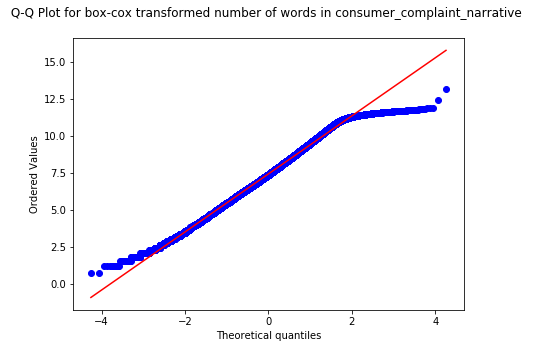

In [45]:
# Boxcox transformation
box_cox_n_words_in_consumer_complaint_narrative = boxcox(n_words_in_consumer_complaint_narrative)[0]

# Checking weather box cox transformed len_question_body_box_cox follows normal distribution or not using Q-Q plot
q_q_plot(box_cox_n_words_in_consumer_complaint_narrative, "box-cox transformed number of words in consumer_complaint_narrative ")

"""
# Saving box_cox_n_words_in_question_body as feature
data[data['consumer_complaint_narrative'].notnull()]['box_cox_n_words_in_consumer_complaint_narrative'] = box_cox_n_words_in_question_body_train 
"""



* It is hard to say that this distribution follows gaussian Distribution.

#### 5.12.4. WordCloud of consumer_complaint_narrative

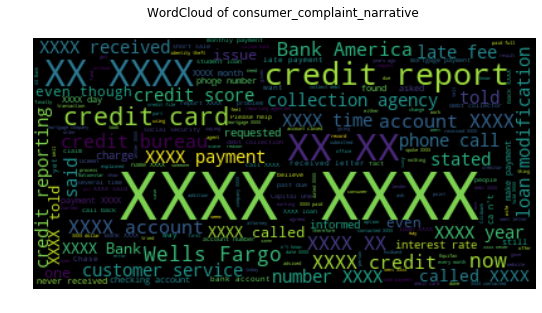

In [46]:
# refer: https://www.datacamp.com/community/tutorials/wordcloud-python

text = " ".join(word for word in data[data['consumer_complaint_narrative'].notnull()]['consumer_complaint_narrative'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WordCloud of consumer_complaint_narrative \n")
plt.axis("off")
plt.show()

* There is alot of text containing financial amount. It would better to preprocess it before visualising WorldCloud.

.
.
.
.


## 6. Preprocessing

### 6.1. Preprocessing Utility Functions for text

##### Steps followed for preprocessing:

1. stripping html tags if available
2. Lowering all caps and decontracting common misspelled words
3. Counting digits and removing it
4. removing non alpha numeric words
5. removing stop words and punctuations
6. stemming

In [90]:
# Preprocessing Functions
# credit : https://www.kaggle.com/urvishp80/quest-encoding-ensemble

mispell_dict = {"aren't" : "are not","can't" : "cannot","couldn't" : "could not","couldnt" : "could not","didn't" : "did not","doesn't" : "does not",
                "doesnt" : "does not","don't" : "do not","hadn't" : "had not","hasn't" : "has not","haven't" : "have not","havent" : "have not",
                "he'd" : "he would","he'll" : "he will","he's" : "he is","i'd" : "I would","i'd" : "I had","i'll" : "I will","i'm" : "I am",
                "isn't" : "is not","it's" : "it is","it'll":"it will","i've" : "I have","let's" : "let us","mightn't" : "might not",
                "mustn't" : "must not","shan't" : "shall not","she'd" : "she would","she'll" : "she will","she's" : "she is","shouldn't" : "should not",
                "shouldnt" : "should not","that's" : "that is","thats" : "that is","there's" : "there is","theres" : "there is","they'd" : "they would",
                "they'll" : "they will","they're" : "they are","theyre":  "they are","they've" : "they have","we'd" : "we would","we're" : "we are",
                "weren't" : "were not","we've" : "we have","what'll" : "what will","what're" : "what are","what's" : "what is","what've" : "what have",
                "where's" : "where is","who'd" : "who would","who'll" : "who will","who're" : "who are","who's" : "who is","who've" : "who have",
                "won't" : "will not","wouldn't" : "would not","you'd" : "you would","you'll" : "you will","you're" : "you are","you've" : "you have",
                "'re": " are","wasn't": "was not","we'll":" will","didn't": "did not","tryin'":"trying"}


imp_keywords = ("R", "r", "C","c", "os", "OS")


# Counting the numeric feature and removing it
def count_digits_and_remove(text):
    """
    counting the number of occurance of digit
    
    return : text , (n_total_digit, n_2_digit, n_3_digit, n_4_digit, n_5_plus_digit)
    
    n_total_digit  : Total occurance of numeric feature
    n_2_digit      : Number of time 2 digit numeric feature occur
    n_2_digit      : Number of time 3 digit numeric feature occur
    n_2_digit      : Number of time 4 digit numeric feature occur
    n_5_plus_digit : Number of time more than 4 digit numeric feature occur
    
    """
    digits = re.findall(r'[0-9]+',text)

    n_total_digit = []
    n_2_digit = []
    n_3_digit = []
    n_4_digit = []
    n_5_plus_digit = []

    n_total_digit.append(len(digits))
    for digit in digits:
        if len(digit)==2:
            n_2_digit.append(digit)

        elif len(digit)==3:
            n_3_digit.append(digit)

        elif len(digit)==4:
            n_4_digit.append(digit)

        elif len(digit)>4:
            n_5_plus_digit.append(digit)
    
    # remove all the numbers
    text = re.sub(r'[0-9]+'," ",text)
            
    return text , (len(n_total_digit), len(n_2_digit), len(n_3_digit), len(n_4_digit), len(n_5_plus_digit))

#======================================================================================================================================
# Counting number of non_alpha_numeric character and removing all the special character words
def count_non_alpha_numeric_and_remove(text):  
    """ Counting number of non_alpha_numeric character(for programinng context) """
    
    # finding all the all the non_alpha_numeric char
    n_special_char = (re.findall(r"[^A-Za-z0-9 :]", text))
    
    # removing it.
    text = re.sub(r"[^A-Za-z0-9]", " ",text)
    
    return text ,len(n_special_char)

#======================================================================================================================================
# Counting the number of all capital word(maybe it would be corelated with labels) and coverting into lower string character
def count_all_cap_words_and_lower_it(text):
    
    """Finding the number of all capital word and lower it"""

    # Find all the capital words
    n_all_capital_words = (re.findall(pattern = r'([A-Z]([A-Z])+)',string=text))
    
    # converting into string into lower char string
    text = text.lower()
    
    return text , len(n_all_capital_words)

#======================================================================================================================================
def _get_mispell(mispell_dict):
    mispell_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))
    return mispell_dict, mispell_re

def replace_typical_misspell(text):
    
    """De-Concatenation of words and correction of misspelled words"""
    mispellings, mispellings_re = _get_mispell(mispell_dict)

    def replace(match):
        return mispellings[match.group(0)]

    return mispellings_re.sub(replace, text)

#======================================================================================================================================

# Return the number of links and text without html tags 
# Also return the counts of 'number of lines'  and remove it
def strip_html(text):
    """ 
    Return the number of links and clean text (without html tags) 
    Also return the counts of 'number of lines'  and remove it
    
    """
    # finding http links using regex and counting it and remove it
    n_links = (re.findall(r'http[s]?://\S+',text))
    text = re.sub(r'http[s]?://\S+'," ",text)
    
    # finding number of lines using regex and counting it and remove it
    n_lines = re.findall(r'\n',text)
    text = re.sub(r'\n', " ",text)
    
    return  text, len(n_links) , len(n_lines)

#======================================================================================================================================
# function to remove all the stopwords and words having lengths less than 3
def remove_stop_words_and_punc(text) :
    
    """ 
    Remove all the stopwords 
    Remove all the words whose length is less than 3 and not belong to important keywords(e.g. 'C','R','OS' etc)
    
    """
    # removing the words from the stop words list: 'no', 'nor', 'not'
    stops = set(stopwords.words("english"))
    stops.remove('no')
    stops.remove('nor')
    stops.remove('not')
    
    text= text.split()
    text = [w for w in text if not w in stops]    
    
    # Removing the words having length less than 3 and not the imp_keyword
    clean_text = []
    for word in text:
        if word not in imp_keywords and len(word)<3:
            pass
        else:
            clean_text.append(word)
          
        
    clean_text = " ".join(clean_text)
    return(clean_text)

#======================================================================================================================================
# function for stemming of words in text
def stem(text):
    stemmer = PorterStemmer()
    result = " ".join([ stemmer.stem(word) for word in text.split(" ")])
    return result

#======================================================================================================================================
# Function to count and remove XXXX from text
def count_n_remove_xxxx(text):
    freq_of_xxxx = (re.findall(pattern = r'[Xx]{4}' , string= text))
    text = re.sub( r'[Xx]{4}', " ", text)
    return text, len(freq_of_xxxx)


In [91]:
#======================================================================================================================================
# Final text cleaning funtion  
def clean_text(text, extra_features=True, strip_html_fn=True, count_all_cap_words_and_lower_it_fn=True, replace_typical_misspell_fn=True, count_digits_and_remove_fn=True,
               count_non_alpha_numeric_and_remove_fn=True, remove_stop_words_and_punc_fn=True,stem_fn=True, remove_xxxx_fn = True):
    """
    This function sequentially execute all the cleaning and preprocessing function and finaly gives cleaned text.
    Input: Boolean values of extra_features, strip_html, count_all_cap_words_and_lower_it, replace_typical_misspell, count_non_alpha_numeric_and_remove, remove_stop_words_and_punc, stem
            (by default all the input values = True)
    
    return: clean text
    
    """
    if strip_html_fn:
        # remove html tags
        clean_text, n_links, n_lines = strip_html(text)
    
    if remove_xxxx_fn:
         clean_text, freq_xxxx = count_n_remove_xxxx(clean_text)
    
    if count_all_cap_words_and_lower_it_fn:
        # Find all the capital words and covert all chars of text into lower char string
        clean_text, n_all_capital_words= count_all_cap_words_and_lower_it(clean_text)

    if replace_typical_misspell_fn:       
        # de-concatenation of words
        clean_text = replace_typical_misspell(clean_text)
    
    if count_digits_and_remove_fn:
        # count the numbers and remove it
        clean_text, (n_total_digit, n_2_digit, n_3_digit, n_4_digit, n_5_plus_digit) = count_digits_and_remove(clean_text)
    
    if count_non_alpha_numeric_and_remove_fn:
        # Count the number of non alpha numeric character and remove it
        clean_text, n_non_alpha_char = count_non_alpha_numeric_and_remove(clean_text)
    
    if remove_stop_words_and_punc_fn:
        # removing Stopwords and the words length less than 3(As these words mostly tend to redundant words) excpect 'C' and 'R'and 'OS' <-- programing keywords
        clean_text = remove_stop_words_and_punc(clean_text)
    
    if stem_fn:
        # stemming ( use only for BOW or TFIDF represention. Not effective for word embedding like w2v or glove)
        clean_text = stem(clean_text)
    
    # return extra_features 
    if extra_features:
        return clean_text, (n_links, n_lines, n_all_capital_words, n_non_alpha_char, n_total_digit, n_2_digit, n_3_digit, n_4_digit, n_5_plus_digit, freq_xxxx)
    
    else:
        return clean_text

#======================================================================================================================================================    
# This function will take dataframe and return cleaned dataframe along with extra features (This fincion will only be used for BOW nd TFIDF representaion)
def clean_data(dataframe,extra_feature=True ):
    
    """
    This function will take dataframe and return cleaned dataframe along with extra features.
    
    Input: dataframe which need to preprocess and extra_feature (by default = True)
    Return: cleaned dataframe and extra features
    
    """
    cleaned_data = []
    extra_feat = []
    
    for i in tqdm(range(dataframe.shape[0])):

        text = dataframe.iloc[i]
        
        if extra_feature:
            cleaned_text, ext_feature = clean_text(text,extra_features=extra_feature)
            cleaned_data.append(cleaned_text)
            extra_feat.append(ext_feature)
            
        else:
            cleaned_text = clean_text(text,extra_features=extra_feature)
            cleaned_data.append(cleaned_text)
            
    return cleaned_data, extra_feat

#### 6.1.1. Preprocessing consumer_complaint_narrative text

##### Note: Keping only those datapoints where consumer_complaint_narrative text is not null

In [92]:
# Keping only those datapoints where consumer_complaint_narrative text is not null
consumer_complaint_narrative_notnull_df = data[data['consumer_complaint_narrative'].notnull()]

# droping duplicate values based on 'consumer_complaint_narrative' and 'product'
consumer_complaint_narrative_notnull_df.drop_duplicates(subset=['consumer_complaint_narrative','product'],keep='first',inplace=True)

In [93]:
text_features_column = ['consumer_complaint_narrative']

for column in text_features_column:
    print(f"\nProcessing text data: {column}")
    cleaned_data, extra_features = clean_data(consumer_complaint_narrative_notnull_df[column], extra_feature = True)
    consumer_complaint_narrative_notnull_df[f"cleaned_{column}"] = cleaned_data
    consumer_complaint_narrative_notnull_df[f"{column}_n_links"] = np.array(extra_features)[:,0]
    consumer_complaint_narrative_notnull_df[f"{column}_n_lines"] = np.array(extra_features)[:,1]
    consumer_complaint_narrative_notnull_df[f"{column}_n_all_capital_words"] = np.array(extra_features)[:,2]
    consumer_complaint_narrative_notnull_df[f"{column}_n_non_alpha_char"] = np.array(extra_features)[:,3]
    consumer_complaint_narrative_notnull_df[f"{column}_n_total_digit"] = np.array(extra_features)[:,4]
    consumer_complaint_narrative_notnull_df[f"{column}_n_2_digit"] = np.array(extra_features)[:,5]
    consumer_complaint_narrative_notnull_df[f"{column}_n_3_digit"] = np.array(extra_features)[:,6]
    consumer_complaint_narrative_notnull_df[f"{column}_n_4_digit"] = np.array(extra_features)[:,7]
    consumer_complaint_narrative_notnull_df[f"{column}_n_5_plus_digit"] = np.array(extra_features)[:,8]
    consumer_complaint_narrative_notnull_df[f"{column}_xxxx_freq"] = np.array(extra_features)[:,9]


Processing text data: consumer_complaint_narrative


100%|███████████████████████████████████████████████████████████████████████████| 65665/65665 [04:08<00:00, 264.38it/s]


##### Sample

In [101]:
# Example of preprocessing
i=10
print(f"before preprocessing:\n{'-'*20}\n {consumer_complaint_narrative_notnull_df['consumer_complaint_narrative'].iloc[i]}")
print(f"\nafter preprocessing:\n{'-'*20}\n {consumer_complaint_narrative_notnull_df['cleaned_consumer_complaint_narrative'].iloc[i]}")

before preprocessing:
--------------------
 I am very disappointed that the CFPB did not help to resolve this fraudulant loan. # XXXX between XXXX XXXX and XXXX, FF ( AKA ) One West. Case # XXXX with CFPB. 


after preprocessing:
--------------------
 disappoint cfpb not help resolv fraudul loan aka one west case cfpb


#### 6.1.2. Preprocessing of consumer_complaint_narrative text for word embedding (without stemming)


##### 6.1.2.1. Preprocessing utility function for word embedding (without stemming)
Only minor change in this function and above preprocessing function is this statement:

 "clean_text(text,extra_features= False, stem_fn=False)" at line 19

In [120]:
#======================================================================================================================================================    
# This function is only for  word embedding pre processing
# This function will take dataframe and return cleaned dataframe (This fincion will only be used for BOW nd TFIDF representaion)
def clean_data_for_embeding(dataframe ):
    
    """
    This function will take dataframe and return cleaned dataframe along with extra features.
    
    Input: dataframe which need to preprocess only for embeddings words
    Return: clean dataframe 
    
    """
    cleaned_data = []
    
    for i in tqdm(range(dataframe.shape[0])):

        text = dataframe.iloc[i]
        
        cleaned_text = clean_text(text,extra_features= False, stem_fn=False) # There is no need of extra_features to calculate again as it is already calculated
        cleaned_data.append(cleaned_text)
      
    return cleaned_data

In [123]:
# Preprocessing for word embedding (without stemming)

text_features_column = ['consumer_complaint_narrative']

for column in text_features_column:
    print(f"\nProcessing text data: {column}")
    cleaned_data = clean_data_for_embeding(consumer_complaint_narrative_notnull_df[column])
    consumer_complaint_narrative_notnull_df[f"cleaned_{column}_for_embedding"] = cleaned_data


Processing text data: consumer_complaint_narrative


100%|██████████████████████████████████████████████████████████████████████████| 65665/65665 [01:04<00:00, 1017.40it/s]


In [125]:
# Sample preproceesing  for word embedding (without stemming)

i = 12
print(f"Before preproceesing: \n{'-'*20}\n{consumer_complaint_narrative_notnull_df['consumer_complaint_narrative'].iloc[i]}")
print(f"After preproceesing: \n{'-'*20}\n{consumer_complaint_narrative_notnull_df['cleaned_consumer_complaint_narrative_for_embedding'].iloc[i]}")

Before preproceesing: 
--------------------
I have a car loan with PNC bank. In XXXX of 2014 I sent a payment of {$250.00} in the form of a money order. PNC bank lost my payment. After that mishap I began to submit. my payments online, via bill payment. Now this month I submitted a payment of {$300.00}, online as before, they will not release the money to my account. I have proof that I sent the payment and PNC bank still refuses to accept the payment. 

After preproceesing: 
--------------------
car loan pnc bank sent payment form money order pnc bank lost payment mishap began submit payments online via bill payment month submitted payment online not release money account proof sent payment pnc bank still refuses accept payment


### 6.2. EDA after preprocessing:  consumer_complaint_narrative text

In [109]:
# Number of datapoints remain after removing datapoints having null consumer_complaint_narrative text
print('shape of data after using datapoints not having null consumer_complaint_narrative text: ',consumer_complaint_narrative_notnull_df.shape)

shape of data after using datapoints not having null consumer_complaint_narrative text:  (65665, 29)


#### 6.2.1 Distribution of number of words in consumer_complaint_narrative before and after preprocessing

1: Plot for consumer_complaint_narrative


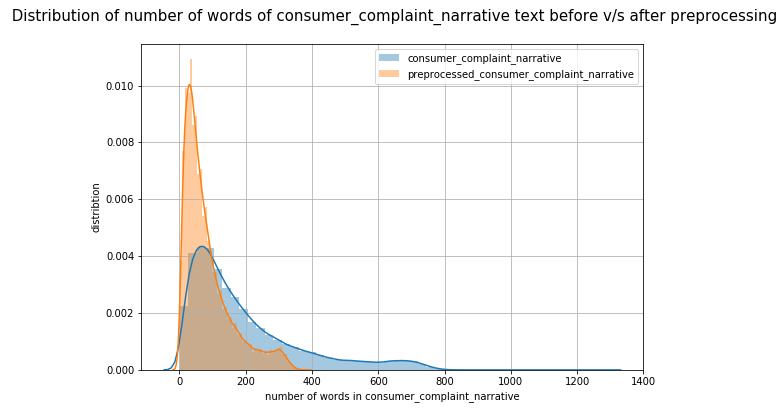

In [119]:
text_features_column = ['consumer_complaint_narrative']

for idx,column in enumerate(text_features_column):
    
    # Calculating the length of text before and after preprocessing
    len_after_cleaning = consumer_complaint_narrative_notnull_df[f'cleaned_{column}'].apply(lambda x : len(x.split()))
    len_before_cleaning = consumer_complaint_narrative_notnull_df[f'{column}'].apply(lambda x : len(x.split()))
    
    # ploting
    print( f"{idx+1}: Plot for {column}")
    plt.figure(figsize=(9,6))
    sns.distplot(len_before_cleaning, label=f'{column}')
    sns.distplot(len_after_cleaning, label=f'preprocessed_{column}')
    plt.title(f" Distribution of number of words of {column} text before v/s after preprocessing\n",fontsize=15)
    plt.ylabel("distribtion")
    plt.xlabel(f"number of words in {column}")
    plt.legend()
    plt.grid()
    plt.show()

#### 6.2.2. WordCloud of consumer_complaint_narrative

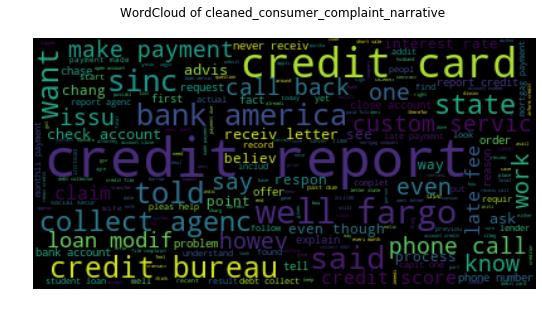

In [110]:
# refer: https://www.datacamp.com/community/tutorials/wordcloud-python

text = " ".join(word for word in consumer_complaint_narrative_notnull_df['cleaned_consumer_complaint_narrative'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WordCloud of cleaned_consumer_complaint_narrative \n")
plt.axis("off")
plt.show()

#### 6.2.3  WordCloud of consumer_complaint_narrative product category wise

1: WordCloud of consumer_complaint_narrative for Mortgage 


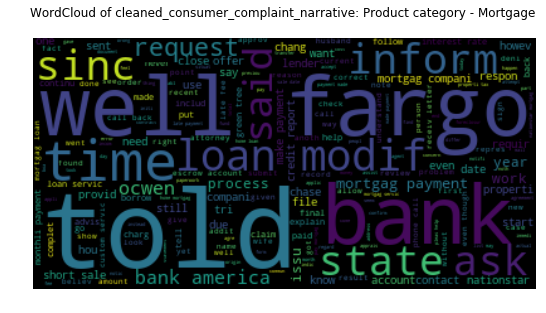

2: WordCloud of consumer_complaint_narrative for Credit reporting 


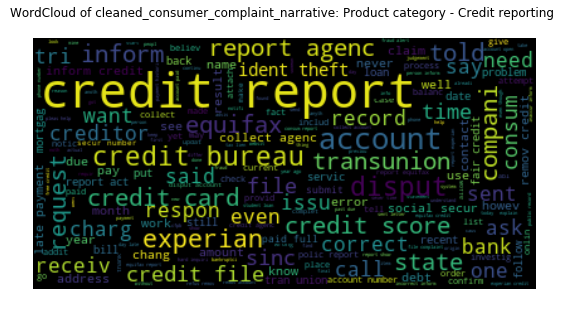

3: WordCloud of consumer_complaint_narrative for Student loan 


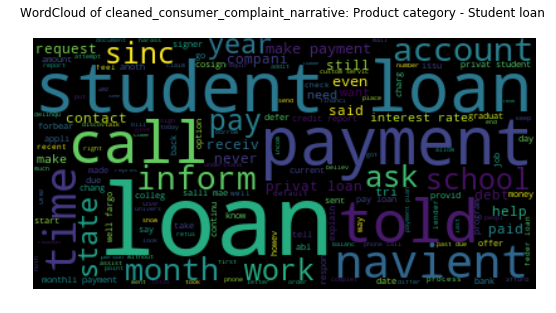

4: WordCloud of consumer_complaint_narrative for Debt collection 


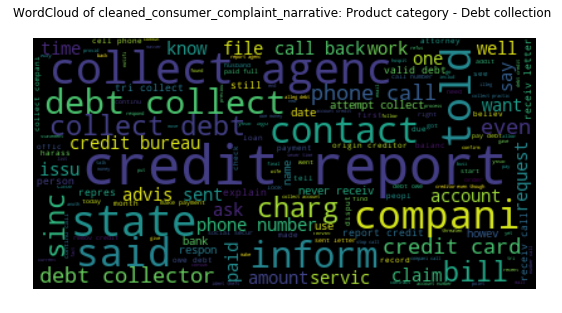

5: WordCloud of consumer_complaint_narrative for Credit card 


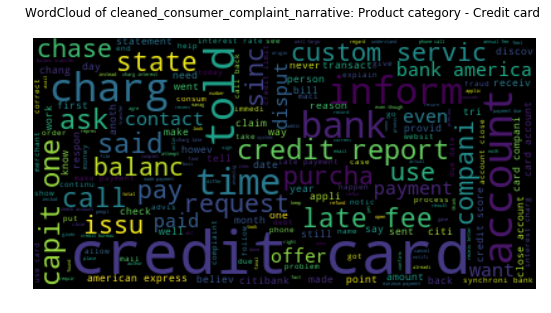

6: WordCloud of consumer_complaint_narrative for Bank account or service 


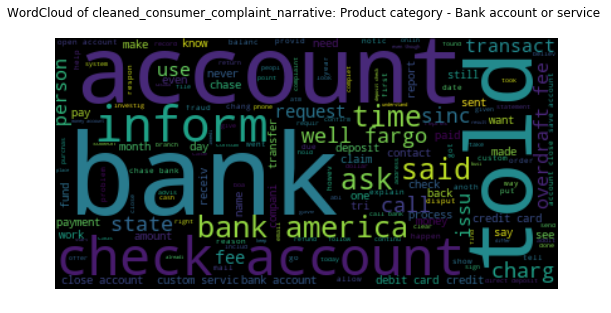

7: WordCloud of consumer_complaint_narrative for Consumer Loan 


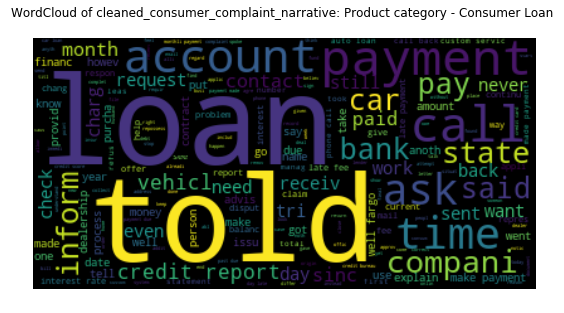

8: WordCloud of consumer_complaint_narrative for Money transfers 


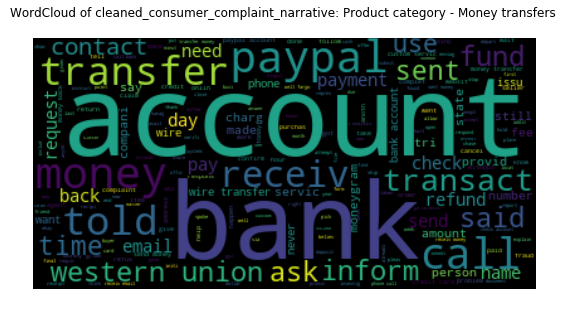

9: WordCloud of consumer_complaint_narrative for Payday loan 


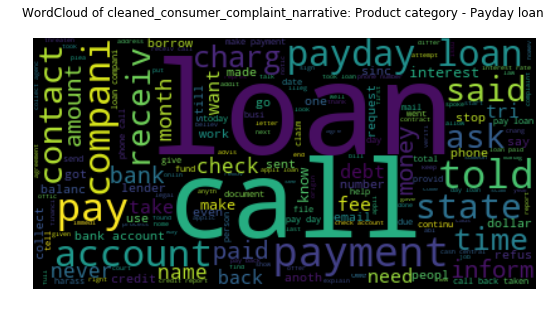

10: WordCloud of consumer_complaint_narrative for Prepaid card 


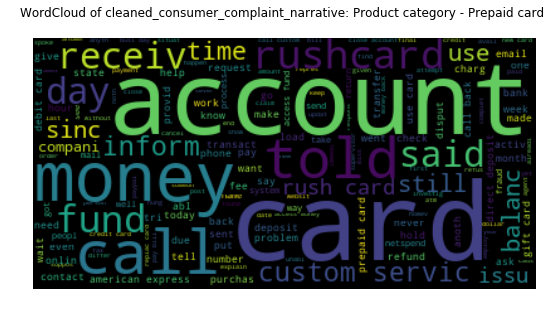

11: WordCloud of consumer_complaint_narrative for Other financial service 


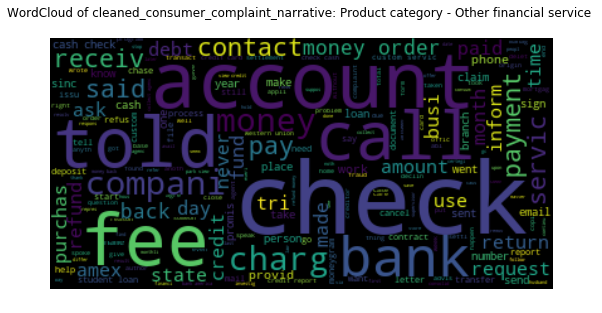

In [115]:
# refer: https://www.datacamp.com/community/tutorials/wordcloud-python

for idx, category in enumerate(data['product'].unique()):
    
    text = " ".join(word for word in consumer_complaint_narrative_notnull_df[consumer_complaint_narrative_notnull_df['product']==category]['cleaned_consumer_complaint_narrative'])

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)
    
    print(f"{idx+1}: WordCloud of consumer_complaint_narrative for {category} ")

    # Display the generated image:
    plt.figure(figsize=(9,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"WordCloud of cleaned_consumer_complaint_narrative: Product category - {category} \n")
    plt.axis("off")
    plt.show()

.
.
.
.


#### Saving Modified Data

#####  Note: Saving only those datapoints where consumer_complaint_narrative is not null

In [239]:
# Saving
consumer_complaint_narrative_notnull_df.to_pickle(path = "data.pkl" )

Modeling is continue in part 2 . . .